## **Import the Libraries & Getting Data**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
movie_metadata = pd.read_csv('../data/movies_metadata.csv')
mpst_data = pd.read_csv('../data/mpst_full_data.csv')

/tmp/ipykernel_196547/842541664.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv('../data/movies_metadata.csv')


### **Merging both mpst and movies_metadata files based on imdb_id to get our final dataset**

In [9]:
dataset = pd.merge(movie_metadata , mpst_data, on='imdb_id')
dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'video',
       'vote_average', 'vote_count', 'title_y', 'plot_synopsis', 'tags',
       'split', 'synopsis_source'],
      dtype='object')

In [10]:
dataset = dataset[['tagline','plot_synopsis','overview']]
dataset.shape

(11387, 3)

## **Dataset Cleaning**

In [11]:
df = dataset.dropna(axis=0)
df.drop_duplicates(keep='first')
df.shape

(8359, 3)

In [12]:
df.head(4)

,tagline,plot_synopsis,overview
1,Roll the dice and unleash the excitement!,The film begins in 1869 in the town of Brantfo...,When siblings Judy and Peter discover an encha...
2,Still Yelling. Still Fighting. Still Ready for...,The feud between Max (Walter Matthau) and John...,A family wedding reignites the ancient feud be...
3,Friends are the people who let you be yourself...,"""Friends are the People who let you be yoursel...","Cheated on, mistreated and stepped on, the wom..."
4,Just When His World Is Back To Normal... He's ...,The film begins five years after the events of...,Just when George Banks has recovered from his ...


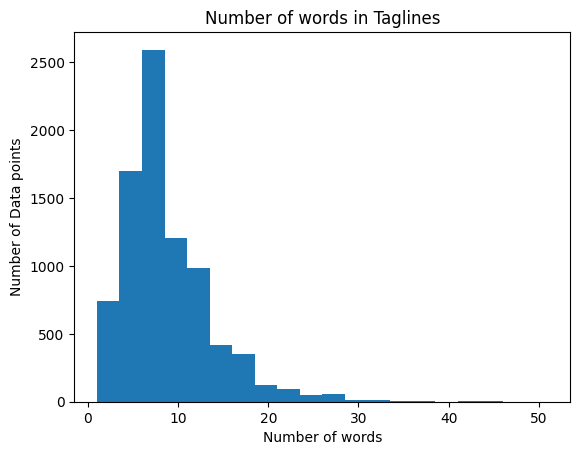

In [13]:
number_of_words_tl = df.tagline.apply(lambda x: len(x.split()))
plt.hist(number_of_words_tl, bins=20 )
plt.xlabel("Number of words")
plt.ylabel("Number of Data points")
plt.title("Number of words in Taglines")
plt.show()

In [14]:
df_sample = df.sample(800,random_state=23)
X = np.array(df_sample["plot_synopsis"])
y = np.array(df_sample["tagline"])

In [15]:
from summarizer import Summarizer
model = Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
pred_tag = []
cntr = 0
for val in X:
    if cntr % 100 == 0:
        print(cntr)
    pred_tag.append(model(val, num_sentences=1))
    cntr+=1
#     if cntr % 40 == 0:
#         break
np_tag = np.array(pred_tag)

0


In [ ]:
df_res = pd.DataFrame()

In [ ]:
df_res["plot_synopsis"] = pd.Series(X)
df_res["tagline"] = pd.Series(y)
df_res["pred_tagline"] = pd.Series(np_tag)

In [ ]:
df_res.to_csv("Extractive_sum.csv", index=False)